In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from astropy.table import Table
from IPython.display import clear_output

In [2]:
hlss_tbl = Table.read("/Users/keith/astr/research_astr/FOV0/catalogs/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt",
                      format='ascii')
hlss_tbl.sort(['Z'], reverse=True)
total_obj = len(hlss_tbl)

seg_map = np.zeros((4088,4088))

In [3]:
A = lambda theta, a, b: ((np.sin(theta)**2)/(a**2)) + ((np.cos(theta)**2)/(b**2))
B = lambda theta, a, b: 2 * np.sin(theta) * np.cos(theta) * ((1/b**2) - (1/a**2))
C = lambda theta, a, b: ((np.sin(theta)**2)/(b**2)) + ((np.cos(theta)**2)/(a**2))

gen_ellipse = lambda x,y,x_0,y_0, ell: (A(*ell) * (x - x_0)**2) + (B(*ell) * (x - x_0) * (y - y_0)) + (C(*ell) * (y - y_0)**2)

In [27]:
hlss_tbl.sort("A_IMAGE")
hlss_tbl

NUMBER,X_IMAGE,Y_IMAGE,A_IMAGE,B_IMAGE,THETA_IMAGE,MAG_F1500W,SPECTEMP,Z,MODIMAGE,MODIMAGE_1,MODIMAGE_2
int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64
43338,1092.8573,698.3461,0.0309,0.0224,187.59,25.11,43338,2.940758,0,9.4876593,-0.7782851
32264,3637.303,3774.0981,0.0347,0.0196,3.32,26.63,32264,3.014019,0,9.4097792,-0.6826492
115914,840.5811,2180.4043,0.0362,0.0269,208.22,24.42,115914,1.529967,0,9.4951788,-0.7321671
150778,1609.9286,2912.3994,0.0368,0.0331,37.82,26.16,150778,2.652557,0,9.4716135,-0.70939
98247,3066.9313,763.6283,0.0408,0.0235,223.11,24.1,98247,2.446712,0,9.4272882,-0.776066
118575,1429.6791,1478.5489,0.0419,0.0398,253.38,25.96,118575,2.293639,0,9.4772637,-0.7539172
148399,2987.7571,3181.7672,0.0419,0.0417,80.0,26.73,148399,2.996144,0,9.4295864,-0.7009636
125415,1360.6953,2637.288,0.0426,0.0358,265.8,26.17,125415,2.429278,0,9.4792452,-0.7179353
96256,2061.7577,3273.0864,0.0463,0.0463,312.56,26.35,96256,1.705035,0,9.4578051,-0.6981951


Labelling  10763  of  10763


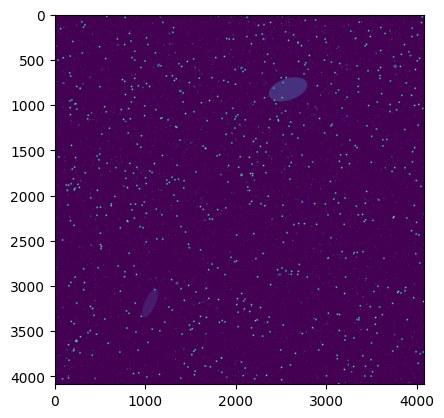

In [4]:
x = np.arange(4088)
y = np.arange(4088)
x_grid, y_grid = np.meshgrid(x,y)
del x
del y

ii = 1
for object in hlss_tbl:

    clear_output(wait=True)
    print("Labelling ", ii, " of ", total_obj)

    num = object["NUMBER"]
    a = object["A_IMAGE"]
    b = object["B_IMAGE"]
    theta = object["THETA_IMAGE"]
    x_0 = object["X_IMAGE"]
    y_0 = object["Y_IMAGE"]

    ellipse = lambda x,y: gen_ellipse(x, y, x_0, y_0, (theta, a, b))
    condition = ellipse(x_grid, y_grid) <= 1

    seg_map[np.where(condition)] = num
    ii += 1

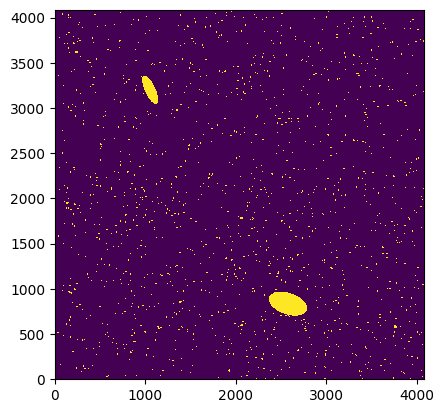

In [15]:
plt.imshow(seg_map, origin='lower', vmin=0, vmax=1, interpolation='nearest')

In [32]:
seg_map[825:835, 2570:2580]

array([[30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.],
       [30267., 30267., 30267., 30267., 30267., 30267., 30267., 30267.,
        30267., 30267.]])

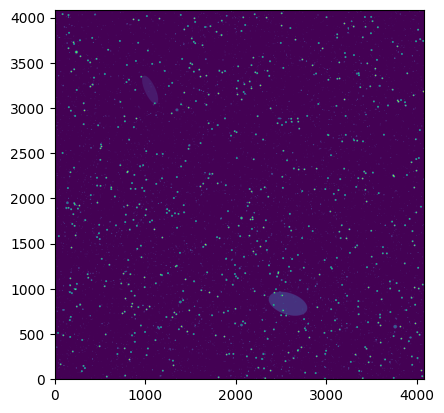

In [30]:
plt.imshow(seg_map, origin='lower')

In [7]:
from astropy.io import fits
ready_direct = "/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/ready_direct_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
seg_from_MOT = "/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits/seg_from_MOT.fits"

file = fits.open(ready_direct)
hdr = file[1].header
file.close()

fits.writeto(seg_from_MOT, data=np.rot90(seg_map, k=3), header=hdr)